In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('unique_inspection.csv')

In [4]:
df.head(3)

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary
0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,18.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-16,1007 MORRIS PARK AVE,rain,Thursday,1
1,1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,5.0,A,05/11/2018,Cycle Inspection / Initial Inspection,2018-05-11,1007 MORRIS PARK AVE,rain,Friday,1
2,2,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,13.0,A,03/04/2019,Cycle Inspection / Initial Inspection,2019-03-04,469 FLATBUSH AVENUE,snow,Monday,1


In [28]:
df_names = df[['DBA', 'CAMIS']]

In [29]:
df_names.drop_duplicates(subset=['CAMIS'], keep = 'first', inplace = True)

/Users/robblatt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
df_name_count = df_names.groupby(['DBA']).count().sort_values(['CAMIS'], ascending=False)

In [59]:
df_name_count.reset_index(inplace = True)

In [60]:
df_name_count.rename(columns = {'CAMIS': 'restaurants'}, inplace = True)

In [73]:
df_name_count.head(2)

,DBA,restaurants
0,DUNKIN',438
1,SUBWAY,277


In [62]:
df_ex = pd.merge(df, df_name_count, how='left', on='DBA')

In [63]:
df_ex.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary,restaurants
0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,18.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-16,1007 MORRIS PARK AVE,rain,Thursday,1,1
1,1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,5.0,A,05/11/2018,Cycle Inspection / Initial Inspection,2018-05-11,1007 MORRIS PARK AVE,rain,Friday,1,1


In [72]:
df_ex

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary,restaurants
0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,18.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-16,1007 MORRIS PARK AVE,rain,Thursday,1,1
1,1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,5.0,A,05/11/2018,Cycle Inspection / Initial Inspection,2018-05-11,1007 MORRIS PARK AVE,rain,Friday,1,1
2,2,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,13.0,A,03/04/2019,Cycle Inspection / Initial Inspection,2019-03-04,469 FLATBUSH AVENUE,snow,Monday,1,40
3,3,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,12.0,A,03/13/2018,Cycle Inspection / Initial Inspection,2018-03-13,469 FLATBUSH AVENUE,snow,Tuesday,1,40
4,4,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,10.0,A,10/06/2017,Cycle Inspection / Re-inspection,2017-10-06,469 FLATBUSH AVENUE,rain,Friday,1,40
5,5,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,7.0,NaN,NaN,Cycle Inspection / Initial Inspection,2017-06-26,469 FLATBUSH AVENUE,none,Monday,0,40
6,6,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,12.0,A,05/16/2018,Cycle Inspection / Initial Inspection,2018-05-16,351 WEST 57 STREET,rain,Wednesday,1,1
7,7,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,10.0,A,12/14/2017,Cycle Inspection / Re-inspection,2017-12-14,351 WEST 57 STREET,snow,Thursday,1,1
8,8,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019.0,2122452912,Irish,13.0,NaN,NaN,Cycle Inspection / Initial Inspection,2017-07-27,351 WEST 57 STREET,none,Thursday,0,1
9,9,40356018,RIVIERA CATERERS,BROOKLYN,11224.0,7183723031,American,10.0,A,10/30/2018,Cycle Inspection / Initial Inspection,2018-10-30,2780 STILLWELL AVENUE,none,Tuesday,0,1


In [99]:
df_score = df_ex.groupby(['restaurants']).sum().sort_values(['SCORE'], ascending=False)

In [100]:
df_score = df_score_count[['SCORE']]

In [101]:
df_score = df_score_count.reset_index(inplace = False)

In [102]:
df_score.head(2)

,index,restaurants,SCORE
0,0,1,1037030.0
1,1,2,92702.0


In [92]:
df_count = df_ex.groupby(['restaurants']).count().sort_values(['SCORE'], ascending=False)

In [93]:
df_count = df_count.reset_index(inplace = False)

In [95]:
df_count = df_count[['restaurants', 'Unnamed: 0']]

In [97]:
df_count.rename(columns = {'Unnamed: 0' : 'count'}, inplace = True)

/Users/robblatt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [117]:
df_score_count = pd.merge(df_count, df_score, how='left', on='restaurants')

In [118]:
df_score_count.drop(['index'], axis = 1, inplace = True)

In [119]:
df_score_count['meany'] = df_score_count['SCORE'] / df_score_count['count']

In [120]:
df_score_count

,restaurants,count,SCORE,meany
0,1,64443,1037030.0,16.092206
1,2,5859,92702.0,15.822154
2,3,2301,35573.0,15.459800
3,438,1181,11852.0,10.035563
4,4,1111,15772.0,14.196220
5,5,927,14612.0,15.762675
6,277,797,8981.0,11.268507
7,266,676,6343.0,9.383136
8,189,542,6155.0,11.356089
9,6,536,7776.0,14.507463


In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
len(df_score_count.restaurants)

45

In [121]:
len(df_score_count.meany)

45

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


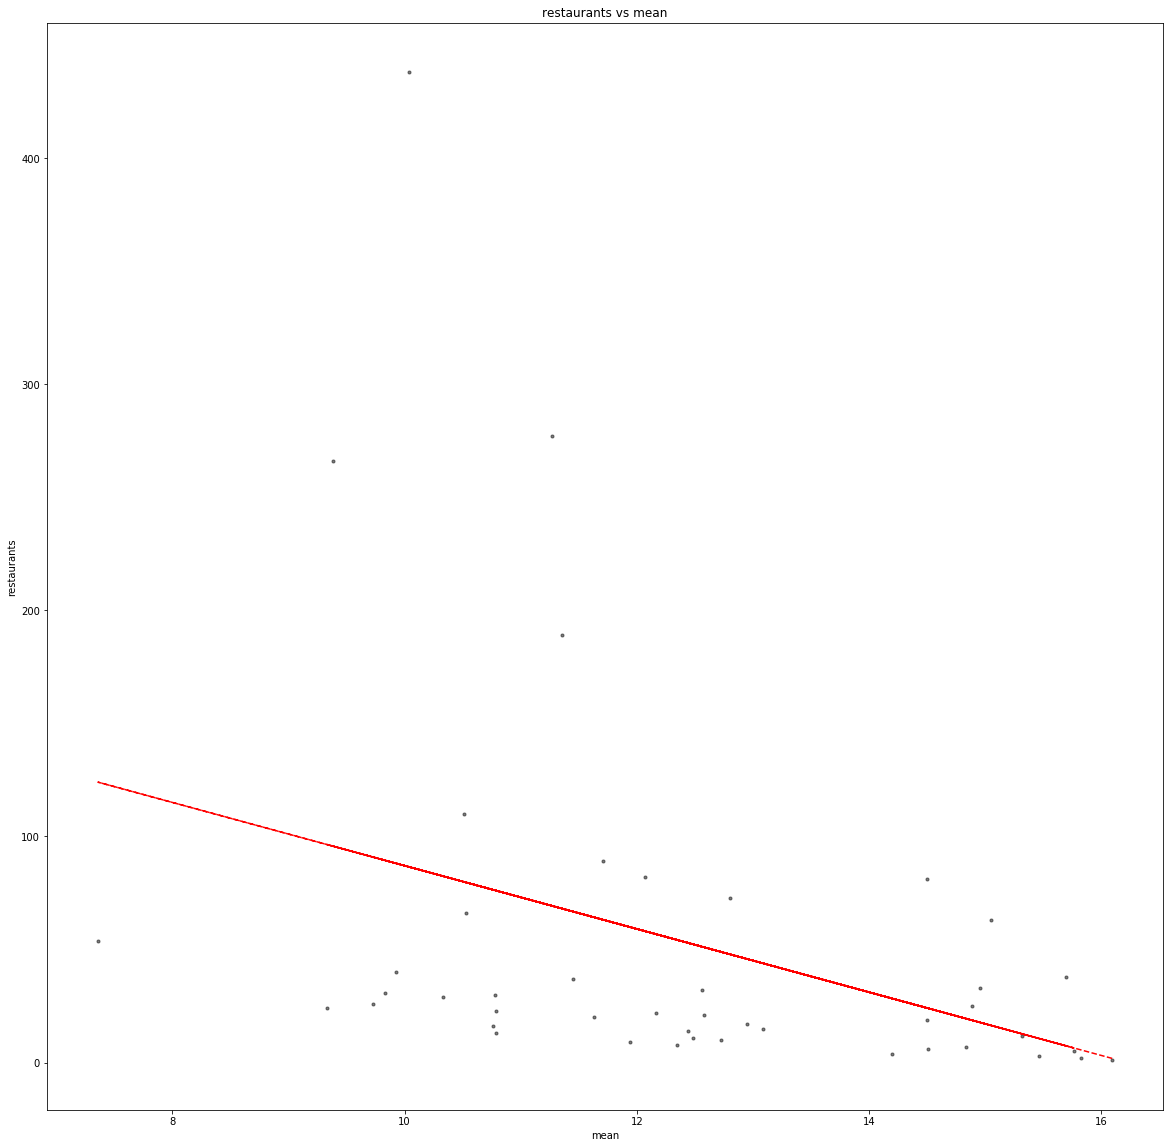

In [133]:
area = np.pi*3
colors = (0,0,0)
x = df_score_count.meany
y = df_score_count.restaurants

plt.figure(figsize=(20, 20))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('restaurants vs mean')
plt.xlabel('mean')
plt.ylabel('restaurants')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()
